In [1]:
!pip install pandas numpy matplotlib seaborn imbalanced-learn scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 86.6 kB/s eta 0:00:0000:0200:05
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


# 📌 Step 1: Load Data 

In this step, we load the dataset and examine its structure.

In [3]:

import pandas as pd

# Load dataset
data = pd.read_csv("creditcard.csv")

# Display the first few rows
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

# Display dataset structure and summary
print(data.info())

# Show dataset dimensions
print(f"Dataset Dimensions: {data.shape}")

# Show random sample of 5 rows
data.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
80979,58745.0,-1.974251,0.608505,0.830995,1.076526,0.127040,-0.774944,-0.244540,-0.513460,-0.837521,...,0.935887,0.208962,-0.615746,0.588026,-0.192154,-0.339943,0.068182,-0.235917,34.72,0
28609,35076.0,1.005675,-2.095422,1.326121,-0.705933,-2.460489,0.371377,-1.543669,0.220619,-0.745272,...,-0.289454,-0.430861,-0.088709,0.569404,0.246164,-0.261324,0.060652,0.053036,195.00,0
70209,53763.0,1.471362,-1.093879,0.337926,-1.502580,-1.278151,-0.405434,-0.972190,-0.186262,-1.821617,...,-0.385348,-0.816269,0.023631,-0.486794,0.255799,-0.365746,0.038954,0.031326,60.00,0
254831,156929.0,-6.315145,5.663786,-4.736951,-1.833987,-1.616344,-2.290698,-0.406827,2.052920,2.497817,...,-0.143437,0.475023,0.232547,-0.061178,0.650712,0.091765,0.741467,0.329554,3.85,0
28742,35135.0,-1.622108,-1.922783,0.193252,-1.482684,2.792970,-1.891735,-0.310713,-0.489498,-1.280866,...,0.310933,0.663680,-0.045677,-0.930157,0.014236,-0.322930,-0.351041,0.368313,10.00,0


# 📌 Step 2: Data Quality Check 

Here, we check for missing values, incorrect data types, and duplicate entries.

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
print("Missing Values:")
print(f"{missing_values[missing_values > 0]}")



Missing Values:
Series([], dtype: int64)


In [6]:

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if necessary
data = data.drop_duplicates()


Number of duplicate rows: 1081


In [7]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 📌 Step 3: Descriptive Statistics 

We analyze basic statistics for numerical variables and check distributions.

In [8]:

# Summary statistics
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


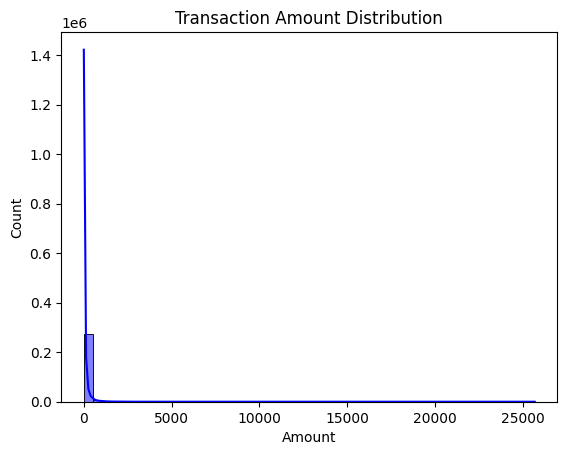

In [9]:

# Plot histogram for 'Amount'
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.show()


# 📌 Step 4: Class Distribution 

Checking the imbalance in fraud (Class 1) vs non-fraud (Class 0) transactions.

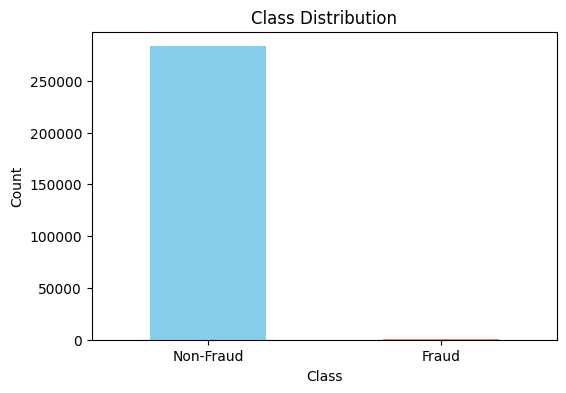

In [10]:

# Class distribution
plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()


# 📌 Step 5: Feature Correlation Analysis 

We explore relationships between features using a correlation matrix.

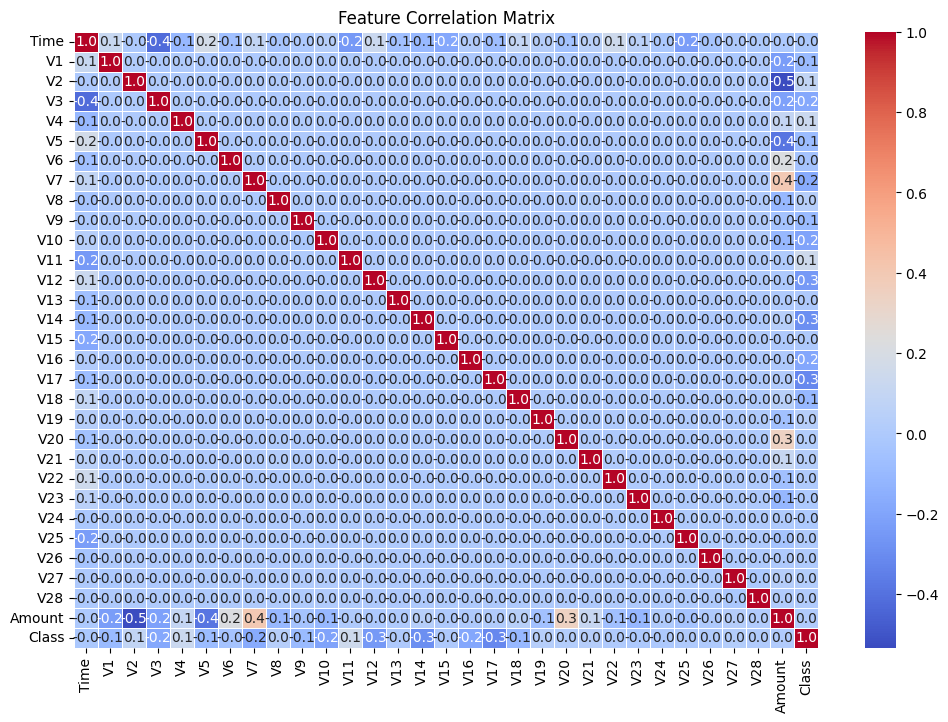

In [11]:

# Compute correlation matrix
corr_matrix = data.corr()

# Display heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# 📌 Step 6: Outlier Analysis 

Checking for outliers in important numerical features.

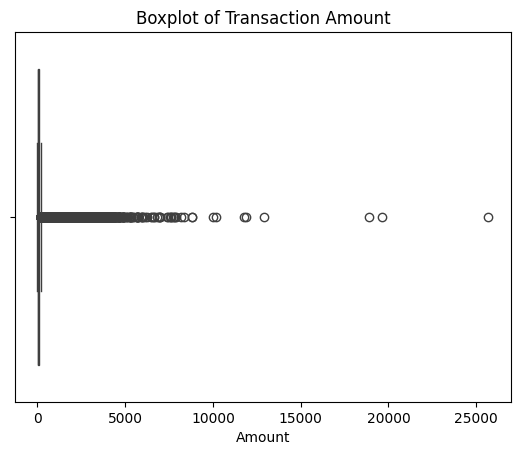

In [12]:

# Boxplot for 'Amount'
sns.boxplot(x=data['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()

# Log transformation suggestion
import numpy as np
data['Amount'] = np.log1p(data['Amount'])


# 📌 Step 7: Handling Class Imbalance 

We use SMOTE to oversample minority class (fraud cases).

In [13]:

from imblearn.over_sampling import SMOTE
from collections import Counter

# Define features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution before and after SMOTE
print(f"Before SMOTE: {Counter(y)}")
print(f"After SMOTE: {Counter(y_resampled)}")


Before SMOTE: Counter({0: 283253, 1: 473})
After SMOTE: Counter({0: 283253, 1: 283253})


# 📌 Step 8: Feature Selection using ANOVA 

We identify the most relevant features for classification.

In [14]:

from sklearn.feature_selection import f_classif
import pandas as pd

# Perform ANOVA test
X_resampled_continuous = X_resampled.select_dtypes(include=['float64', 'int64'])
F_values, p_values = f_classif(X_resampled_continuous, y_resampled)

# Display results
anova_results = pd.DataFrame({'Feature': X_resampled_continuous.columns,
                              'F-Value': F_values,
                              'P-Value': p_values}).sort_values(by='F-Value', ascending=False)
print(anova_results)


   Feature        F-Value        P-Value
14     V14  878052.865165   0.000000e+00
4       V4  665899.503232   0.000000e+00
11     V11  562628.412165   0.000000e+00
12     V12  552329.066119   0.000000e+00
10     V10  444384.560582   0.000000e+00
16     V16  346433.956722   0.000000e+00
9       V9  310627.105490   0.000000e+00
3       V3  298690.186222   0.000000e+00
17     V17  284974.264002   0.000000e+00
2       V2  200762.456621   0.000000e+00
7       V7  190110.283808   0.000000e+00
18     V18  168759.786464   0.000000e+00
6       V6  149120.171605   0.000000e+00
1       V1  137232.417330   0.000000e+00
5       V5   96848.990643   0.000000e+00
19     V19   55224.871341   0.000000e+00
20     V20   26181.154033   0.000000e+00
0     Time   12615.291496   0.000000e+00
8       V8   12198.462272   0.000000e+00
21     V21   11819.566021   0.000000e+00
27     V27   11441.815439   0.000000e+00
28     V28    6702.210372   0.000000e+00
24     V24    5642.187471   0.000000e+00
29  Amount    49

# 📌 Step 9: Model Training with Random Forest 

We train a Random Forest classifier on the selected features.

In [15]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Select top features
X_selected = X_resampled[['V7', 'V10', 'V14', 'V4', 'V11', 'V12']]
y_selected = y_resampled

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84714   166]
 [   43 85029]]


# 📌 Step 10: Model Evaluation using ROC-AUC 

We assess model performance using the ROC-AUC curve.

In [16]:

from sklearn.metrics import roc_auc_score

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9988
